In [1]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn 
import pandas as pd 
import os 
import sys
import time 
import tensorflow as tf 
from tensorflow import keras 

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.2.0
sys.version_info(major=3, minor=7, micro=3, releaselevel='final', serial=0)
matplotlib 3.2.1
numpy 1.18.5
pandas 1.0.4
sklearn 0.23.1
tensorflow 2.2.0
tensorflow.keras 2.3.0-tf


In [2]:
# 导入数据
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
print(housing.DESCR)
print(housing.data.shape)
print(housing.target.shape)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [3]:
from sklearn.model_selection import train_test_split

x_train_all, x_test, y_train_all, y_test = train_test_split(
    housing.data, housing.target, random_state=7)

x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_all, y_train_all, random_state= 11)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)
print(x_test.shape, y_test.shape)

(11610, 8) (11610,)
(3870, 8) (3870,)
(5160, 8) (5160,)


In [4]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# x_train: [None, 28, 28] -> [None, 784] -> [None, 28, 28]
x_train_scaled = scaler.fit_transform(x_train)
x_valid_scaled = scaler.transform(x_valid)
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled.shape)
print(x_valid_scaled.shape)
print(x_test_scaled.shape)
print(np.max(x_train), np.min(x_train), np.max(x_train_scaled), np.min(x_train_scaled))

(11610, 8)
(3870, 8)
(5160, 8)
28566.0 -124.3 81.80221745207753 -2.3594398206242224


In [13]:
# 子类API
input_wide = keras.layers.Input(shape=[5])
input_deep = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation='relu')(input_deep)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_wide, hidden2])
output = keras.layers.Dense(1)(concat)

model = keras.models.Model(inputs=[input_wide, input_deep],
                          outputs=[output])

model.summary()

model.compile(loss='mean_squared_error', optimizer='sgd')
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-10)]

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 30)           210         input_8[0][0]                    
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_8 (Dense)                 (None, 30)           930         dense_7[0][0]                    
____________________________________________________________________________________________

In [14]:
x_train_scaled_wide = x_train_scaled[:, :5]
x_train_scaled_deep = x_train_scaled[:, 2:]
x_valid_scaled_wide = x_valid_scaled[:, :5]
x_valid_scaled_deep = x_valid_scaled[:, 2:]
x_test_scaled_wide = x_test_scaled[:, :5]
x_test_scaled_deep = x_test_scaled[:, 2:]

history=model.fit([x_train_scaled_wide, x_train_scaled_deep], y_train, 
                 validation_data=([x_valid_scaled_wide, x_valid_scaled_deep], y_valid),
                 epochs=100, 
                 callbacks = callbacks)

Epoch 1/100
363/363 [==============================] - 0s 955us/step - loss: 0.9339 - val_loss: 0.5835
Epoch 2/100
363/363 [==============================] - 0s 856us/step - loss: 0.5124 - val_loss: 0.5096
Epoch 3/100
363/363 [==============================] - 0s 877us/step - loss: 0.4681 - val_loss: 0.4724
Epoch 4/100
363/363 [==============================] - 0s 865us/step - loss: 0.4438 - val_loss: 0.4500
Epoch 5/100
363/363 [==============================] - 0s 845us/step - loss: 0.4197 - val_loss: 0.4343
Epoch 6/100
363/363 [==============================] - 0s 850us/step - loss: 0.4100 - val_loss: 0.4273
Epoch 7/100
363/363 [==============================] - 0s 846us/step - loss: 0.3992 - val_loss: 0.4116
Epoch 8/100
363/363 [==============================] - 0s 844us/step - loss: 0.3915 - val_loss: 0.3983
Epoch 9/100
363/363 [==============================] - 0s 853us/step - loss: 0.3807 - val_loss: 0.3958
Epoch 10/100
363/363 [==============================] - 0s 847us/step - l

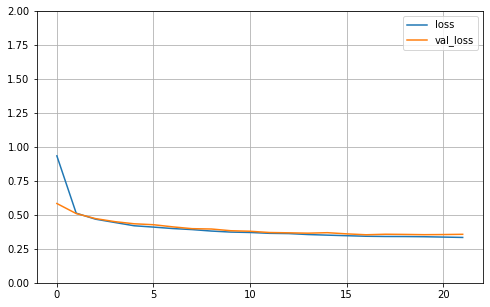

In [15]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 2)
    plt.show()
plot_learning_curves(history)

# 1. 参数众多，训练不充分
# 2. 梯度（导数）消失 --> 链式法则 --> 复合函数求导 f(g(x)) 
#   批归一化可以缓解梯度小时：批归一化使得每层的值变得更加的规整

In [16]:
model.evaluate([x_test_scaled_wide, x_test_scaled_deep], y_test)

162/162 [==============================] - 0s 531us/step - loss: 0.3504


0.35038095712661743